In [ ]:
!pip install numpy
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install umap-learn[plot]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.8 MB/s eta 0:00:00


In [ ]:
from statistics import linear_regression
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
import nltk
import umap
from nltk.help import upenn_tagset
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score, average_precision_score
import pandas as pd
import numpy as np
import time
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import auc
from sklearn.naive_bayes import MultinomialNB

from nltk.corpus import wordnet,subjectivity,stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tag.perceptron import PerceptronTagger
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support
import re
import string
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression

# nltk.download("subjectivity")
# nltk.download('tagsets_json')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('stopwords')

In [ ]:
def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None




print(subjectivity.categories())
# print(subjectivity.sents(categories="subj"))
subjective_sentences = subjectivity.sents(categories="subj")
objective_sentences = subjectivity.sents(categories="obj")

data_with_labels = []
assert(len(subjective_sentences) == len(objective_sentences))
for i in range(len(subjective_sentences)):
    obj_sentence = objective_sentences[i]
    subj_sentence = subjective_sentences[i]
    data_with_labels.append({"label":"obj","sentence":obj_sentence})
    data_with_labels.append({"label":"subj","sentence":subj_sentence})

# print(upenn_tagset()) -> Μέρη του λόγου σε προτάσεις και σε τι κλήση κλπ βρίσκονται
lemmatizer = WordNetLemmatizer()
tagger = PerceptronTagger()
docs = []
labels = []
for doc in tqdm(data_with_labels):
    sentence = " ".join(doc["sentence"])
    label = doc["label"]
    document = re.sub(r'\W', ' ', str(sentence))

    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    document = re.sub(r'\s+', ' ', document, flags=re.I)

    document = document.lower()

    document = document.split()

    doc_pos = [x[1] for x in tagger.tag(document)]

    document = \
        [lemmatizer.lemmatize(token, pos=nltk_pos_tagger(pos_tag)) \
             if nltk_pos_tagger(pos_tag) != None else lemmatizer.lemmatize(token) \
         for token, pos_tag in zip(document, doc_pos)]

    document = ' '.join(document)

    docs.append(document)
    value_of_label = 0 if label == "subj" else 1
    labels.append(value_of_label)
    # labels.append(label)
# print(docs)
print(len(subjective_sentences),len(objective_sentences))

['obj', 'subj']


100%|██████████| 10000/10000 [00:32<00:00, 306.72it/s]

5000 5000


In [ ]:
train_sentences,test_sentences,train_labels,test_labels = train_test_split(docs, labels, test_size=0.3, random_state=1924)

print(len(train_sentences), len(train_labels))
print(len(test_sentences), len(test_labels))

print(train_sentences[0], "**", train_labels[0])
print(test_sentences[0], "--", test_labels[0])
# Use unigram & bi-gram tf*idf features
vectorizer = TfidfVectorizer(
    ngram_range = (1, 2),
    max_features = 5000,
    #tf -> 1 + log(tf).
    sublinear_tf = True,
    stop_words = stopwords.words('english'))

x_train_tfidf = vectorizer.fit_transform(train_sentences)
x_test_tfidf = vectorizer.transform(test_sentences)

print(vectorizer.get_feature_names_out()) # print(vectorizer.get_feature_names()) --> for older versions

NameError: name 'train_test_split' is not defined

Shape:  (7000, 2)


<Axes: title={'center': 'UMAP Reduction'}>

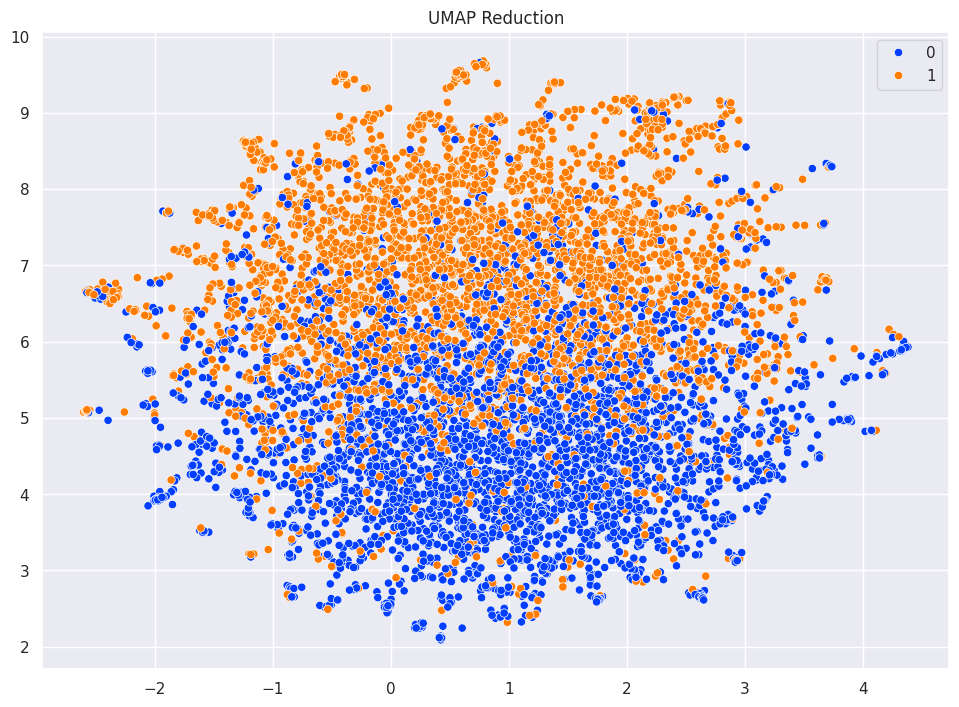

In [ ]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)
reducer = umap.UMAP(n_components=2)
x_train_embedding = reducer.fit_transform(x_train_tfidf)
print('Shape: ', x_train_embedding.shape)


plt.figure()
plt.title('UMAP Reduction')
sns.scatterplot(x=x_train_embedding[:,0],
                y=x_train_embedding[:,1],
                hue=train_labels,
                legend='full',
                palette=palette)

Training took: 0.0048754215240478516 seconds 

Train accuracy: 50.71%
Test accuracy: 48.33% 


Confusion Matrix for test data:
Classification report for baseline
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65      3000

    accuracy                           0.48      3000
   macro avg       0.50      0.24      0.33      3000
weighted avg       1.00      0.48      0.65      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


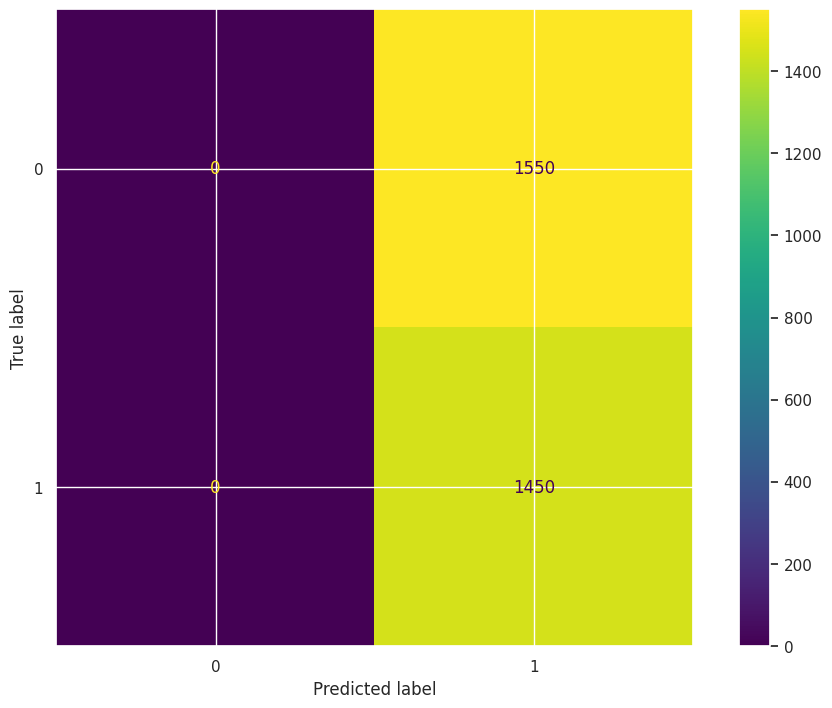

In [ ]:
baseline = DummyClassifier(strategy='most_frequent')
start_time = time.time()
baseline.fit(x_train_tfidf, train_labels)
print("Training took: {} seconds \n".format(time.time() - start_time))

predictions = baseline.predict(x_train_tfidf)
score = accuracy_score(train_labels, predictions)
print("Train accuracy: {:.2f}%".format(score*100))

predictions_test = baseline.predict(x_test_tfidf)
score = accuracy_score(test_labels, predictions_test)
print("Test accuracy: {:.2f}% \n".format(score*100))

confusion_plot = ConfusionMatrixDisplay

confusion_plot.from_estimator(estimator=baseline,
                              X=x_test_tfidf,
                              y=test_labels,
                              values_format = '.0f')
print("\nConfusion Matrix for test data:")




print("Classification report for baseline")
results = classification_report(predictions_test, test_labels)
print(results)

In [ ]:
sklearn_logistic_regression_classifier = DummyClassifier(strategy="most_frequent")
start_time = time.time()
sklearn_logistic_regression_classifier.fit(x_train_tfidf, train_labels)
finish_time = time.time()
var_float_total_time = finish_time - start_time
print("Completion Time for Training: {0:.2f} seconds".format(start_time))
ndarray_predicted_category_labels_train_data = sklearn_logistic_regression_classifier.predict(x_train_tfidf)
ndarray_predicted_category_labels_test_data = sklearn_logistic_regression_classifier.predict(x_test_tfidf)
print("Predicted Train Labels Length is: ", len(ndarray_predicted_category_labels_train_data))
print("Predicted Test Labels Length is: ", len(ndarray_predicted_category_labels_test_data))
array_support_train_data = precision_recall_fscore_support(train_labels, ndarray_predicted_category_labels_train_data, average = None)
array_support_test_data = precision_recall_fscore_support(test_labels, ndarray_predicted_category_labels_test_data, average = None)

str_metrics_train_data = classification_report(ndarray_predicted_category_labels_train_data, train_labels)
str_metrics_test_data = classification_report(ndarray_predicted_category_labels_test_data, test_labels)
array_precision_scores_train_data = precision_score(train_labels, ndarray_predicted_category_labels_train_data, average = None)
array_precision_scores_test_data = precision_score(test_labels, ndarray_predicted_category_labels_test_data,  average = None)
array_recall_scores_train_data = recall_score(train_labels, ndarray_predicted_category_labels_train_data, average = None)
array_recall_scores_test_data = recall_score(test_labels, ndarray_predicted_category_labels_test_data,  average = None)
array_f1_scores_train_data = f1_score(train_labels, ndarray_predicted_category_labels_train_data, average = None)
array_f1_scores_test_data = f1_score(test_labels, ndarray_predicted_category_labels_test_data,  average = None)


print("====For Logistic Regression ======")

print("Support for train data is: ", array_support_train_data )
print("Precision scores for train data: ", array_precision_scores_train_data)
print("Recall scores for train data: ", array_recall_scores_train_data)
print("F1 Scores for train data: ", array_f1_scores_train_data)

print("Support for test data is: ", array_support_test_data)
# print("Precision scores for test data: ", array_precision_scores_test_data,  "\n type is", type(array_precision_scores_test_data))
print("Recall scores for test data: ", array_recall_scores_test_data)
print("F1 Scores for test data: ", array_f1_scores_test_data)
print("Metrics for training data")
print(str_metrics_train_data)
print("Metrics for testing data")
print(str_metrics_test_data)

Completion Time for Training: 1731446936.53 seconds
Predicted Train Labels Length is:  7000
Predicted Test Labels Length is:  3000
====For Logistic Regression ======
Support for train data is:  (array([0.        , 0.50714286]), array([0., 1.]), array([0.        , 0.67298578]), array([3450, 3550]))
Precision scores for train data:  [0.         0.50714286]
Recall scores for train data:  [0. 1.]
F1 Scores for train data:  [0.         0.67298578]
Support for test data is:  (array([0.        , 0.48333333]), array([0., 1.]), array([0.        , 0.65168539]), array([1550, 1450]))
Recall scores for test data:  [0. 1.]
F1 Scores for test data:  [0.         0.65168539]
Metrics for training data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.67      7000

    accuracy                           0.51      7000
   macro avg       0.50      0.25      0.34      7000
weighted avg       1.00      0.51  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
sklearn_logistic_regression_classifier = LogisticRegression(solver="liblinear")
start_time = time.time()
sklearn_logistic_regression_classifier.fit(x_train_tfidf, train_labels)
finish_time = time.time()
var_float_total_time = finish_time - start_time
print("Completion Time for Training: {0:.2f} seconds".format(start_time))
ndarray_predicted_category_labels_train_data = sklearn_logistic_regression_classifier.predict(x_train_tfidf)
ndarray_predicted_category_labels_test_data = sklearn_logistic_regression_classifier.predict(x_test_tfidf)
print("Predicted Train Labels Length is: ", len(ndarray_predicted_category_labels_train_data))
print("Predicted Test Labels Length is: ", len(ndarray_predicted_category_labels_test_data))
array_support_train_data = precision_recall_fscore_support(train_labels, ndarray_predicted_category_labels_train_data, average = None)
array_support_test_data = precision_recall_fscore_support(test_labels, ndarray_predicted_category_labels_test_data, average = None)

str_metrics_train_data = classification_report(ndarray_predicted_category_labels_train_data, train_labels)
str_metrics_test_data = classification_report(ndarray_predicted_category_labels_test_data, test_labels)
array_precision_scores_train_data = precision_score(train_labels, ndarray_predicted_category_labels_train_data, average = None)
array_precision_scores_test_data = precision_score(test_labels, ndarray_predicted_category_labels_test_data,  average = None)
array_recall_scores_train_data = recall_score(train_labels, ndarray_predicted_category_labels_train_data, average = None)
array_recall_scores_test_data = recall_score(test_labels, ndarray_predicted_category_labels_test_data,  average = None)
array_f1_scores_train_data = f1_score(train_labels, ndarray_predicted_category_labels_train_data, average = None)
array_f1_scores_test_data = f1_score(test_labels, ndarray_predicted_category_labels_test_data,  average = None)


print("====For Logistic Regression ======")

print("Support for train data is: ", array_support_train_data )
print("Precision scores for train data: ", array_precision_scores_train_data)
print("Recall scores for train data: ", array_recall_scores_train_data)
print("F1 Scores for train data: ", array_f1_scores_train_data)

print("Support for test data is: ", array_support_test_data)
# print("Precision scores for test data: ", array_precision_scores_test_data,  "\n type is", type(array_precision_scores_test_data))
print("Recall scores for test data: ", array_recall_scores_test_data)
print("F1 Scores for test data: ", array_f1_scores_test_data)
print("Metrics for training data")
print(str_metrics_train_data)
print("Metrics for testing data")
print(str_metrics_test_data)

Completion Time for Training: 1731447583.57 seconds
Predicted Train Labels Length is:  7000
Predicted Test Labels Length is:  3000
====For Logistic Regression ======
Support for train data is:  (array([0.94279043, 0.93844432]), array([0.93623188, 0.94478873]), array([0.93949971, 0.94160584]), array([3450, 3550]))
Precision scores for train data:  [0.94279043 0.93844432]
Recall scores for train data:  [0.93623188 0.94478873]
F1 Scores for train data:  [0.93949971 0.94160584]
Support for test data is:  (array([0.88673139, 0.87628866]), array([0.88387097, 0.87931034]), array([0.88529887, 0.8777969 ]), array([1550, 1450]))
Recall scores for test data:  [0.88387097 0.87931034]
F1 Scores for test data:  [0.88529887 0.8777969 ]
Metrics for training data
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3426
           1       0.94      0.94      0.94      3574

    accuracy                           0.94      7000
   macro avg       0.94  

[0.00938715 0.01215822 0.01732691 ... 0.97748849 0.97857549 0.98059502] <class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Macro avg AUC 0.30628694448519744
Macro average recall [0.8857953281423805, 0.8857730812013348, 0.8855172413793104, 0.885472747497219, 0.8854505005561735, 0.8854282536151279, 0.8851946607341491, 0.8851724137931034, 0.8851501668520578, 0.8850834260289211, 0.885027808676307, 0.8848720800889878, 0.8848275862068966, 0.8847385984427141, 0.8847274749721914, 0.8847052280311457, 0.8846829810901001, 0.8846607341490546, 0.8846607341490544, 0.8846273637374861, 0.8845717463848721, 0.8845494994438265, 0.8844493882091213, 0.8844271412680756, 0.88440489432703, 0.88440489432703, 0.8843937708565073, 0.8843826473859844, 0.8843826473859844, 0.8843381535038932, 0.8843381535038932, 0.8843159065628476, 0.8843159065628476, 0.8843047830923247, 0.8842936596218021, 0.8842936596218021, 0.8842825361512792, 0.8842714126807564, 0.8842714126807564, 0.8842491657397108, 0.8842491657397108, 0.8842269187986652, 0.8842046718576195, 0.8841268075639599, 0.8841045606229143, 0.8840823136818687, 0.8840823136818687, 0.88407119

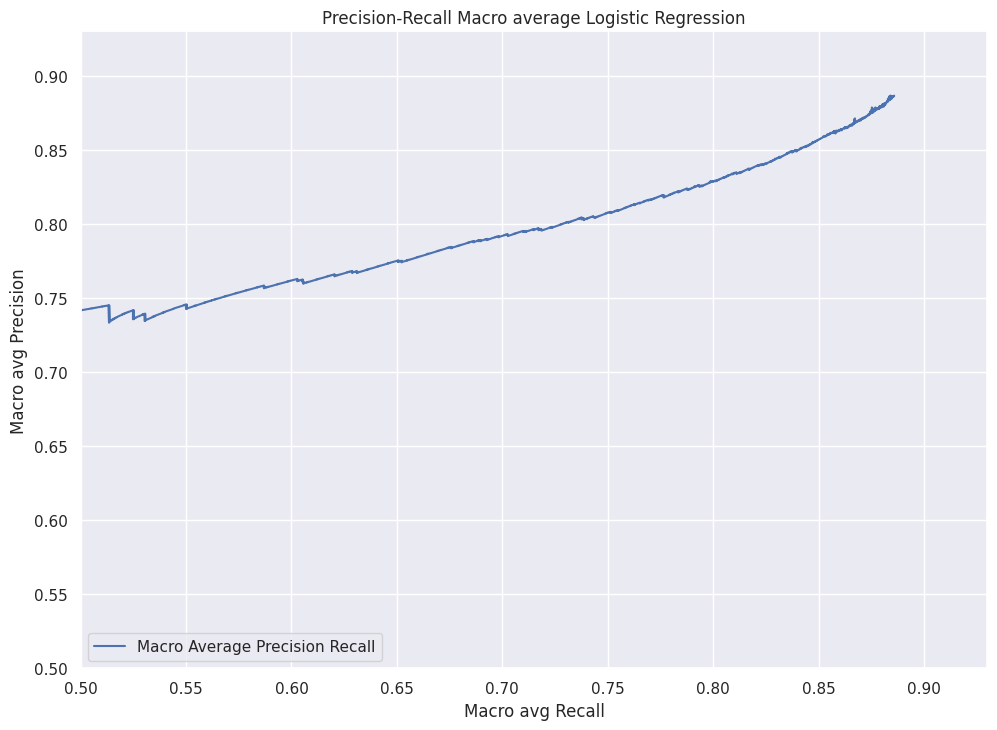

Area is:  0.9500080114505707


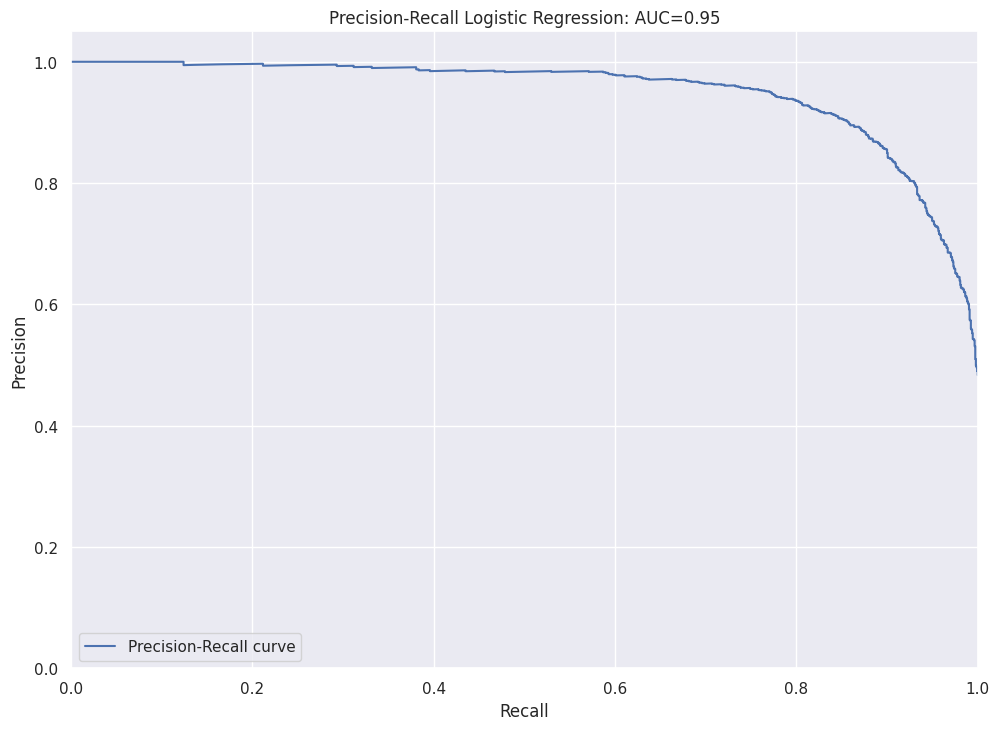

In [ ]:
np.seterr(all='ignore')
estimators = {'Logistic Regression':sklearn_logistic_regression_classifier}
              #"Baseline":baseline}
              # 'SVM':svm.SVC(kernel='linear', probability=True)}

macro_avg_prec_recall = 0
for (name,estimator) in estimators.items():

    model = estimator
    # model.fit(x_train_tfidf,train_labels)
    # We use the probabilities because the precision_recall_curve function needs them
    pred = model.predict_proba(x_test_tfidf)
    # model.predict() returns outputs of 0 or 1
    # model.predict_proba() returns an array: [P(x=0), P(x=1)]

    precision, recall, thresholds = precision_recall_curve(test_labels, pred[:,1])

    macro_avg_recall = []
    macro_avg_precision = []
    print(thresholds,type(thresholds))
    for t in thresholds:
        precisions = precision_score(test_labels, pred[:,1] > t,average=None,zero_division="warn")
        recalls = recall_score(test_labels,pred[:,1] > t,average=None,zero_division="warn")
        avg_precision = np.average(precisions)
        avg_recalls = np.average(recalls)
        macro_avg_precision.append(avg_precision)
        macro_avg_recall.append(avg_recalls)

    new_prec = []
    new_recall = []
    while(len(macro_avg_recall) > 0):
        current_max,current_index = max((value,index) for index,value in enumerate(macro_avg_recall))
        new_recall.append(current_max.item())
        new_prec.append(macro_avg_precision[current_index].item())
        macro_avg_recall.remove(current_max)
    print("Macro avg AUC",auc(new_recall,new_prec))

    print("Macro average recall",new_recall)
    print("Macro average precision",new_prec)
    # macro_avg_area = auc(macro_avg_recall,macro_avg_precision)
    plt.figure()
    plt.plot(new_recall,new_prec,label="Macro Average Precision Recall")
    plt.xlabel("Macro avg Recall")
    plt.ylabel("Macro avg Precision")
    plt.ylim([0.5, 0.93])
    plt.xlim([0.5, 0.93])
    plt.title(f'Precision-Recall Macro average {name}')
    plt.legend(loc="lower left")
    plt.show()

    area = auc(recall, precision)
    print("Area is: ",area)

    plt.figure()
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall %s: AUC=%0.2f' % (name,area))
    plt.legend(loc="lower left")
    plt.show()




In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1-score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,scoring='f1', train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

In [ ]:
test_sizes = [0.1,0.2,0.3,0.4,0.5]
for test_sz in test_sizes:
  x,y = x_train_tfidf,train_labels
  title = f"Learning Curves (Logistic Regression) Test Size={test_sz}"
  cv = ShuffleSplit(n_splits=5, test_size = test_sz , random_state=1924)
  estimator = sklearn_logistic_regression_classifier
  plot_learning_curve(estimator, title, x, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

NameError: name 'x_train_tfidf' is not defined

In [ ]:
lr_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('lr', LogisticRegression())])

NameError: name 'Pipeline' is not defined

In [ ]:
grid_params = {
  'lr__solver': ['liblinear'],
  'lr__C': np.linspace(0.1, 1, 10),
  'lr__max_iter': [50, 100, 200],
  'tfidf_vectorizer__min_df': np.linspace(0.01, 0.1, 10),
  'tfidf_vectorizer__ngram_range': [(1,1),(1,2),(1,3)],
  'tfidf_vectorizer__sublinear_tf': [True,False],
}

In [ ]:
clf = GridSearchCV(lr_pipeline, grid_params,scoring='f1',cv=3, n_jobs=-1)
start_time = time.time()
clf.fit(train_sentences, train_labels)
print("GridSearchCV took: {} seconds \n".format(time.time() - start_time))

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

KeyboardInterrupt: 

In [ ]:
clf2 = RandomizedSearchCV(lr_pipeline, grid_params, scoring='f1', cv=3, n_jobs=-1, n_iter=100)
start_time = time.time()
clf2.fit(train_sentences, train_labels)
print("RandomizedSearchCV took: {} seconds \n".format(time.time() - start_time))

print("Best Score: ", clf2.best_score_)
print("Best Params: ", clf2.best_params_)